In [1]:
import numpy as np
from debug_rl.envs.gridcraft import GridEnv, spec_from_string, plot_grid_values
from debug_rl.solvers import OracleViSolver, OracleCviSolver

# Gridcraft examples

In [2]:
# Construct the environment
maze = spec_from_string("SOOO\\"+
                        "OLLL\\"+
                        "OOOO\\"+
                        "OLRO\\")
T = 50
env = GridEnv(maze, trans_eps=0.0, horizon=T)

In [3]:
# compute value iteration
solver = OracleViSolver(env)
values = solver.solve()  # SxA
policy = solver.compute_policy(values)  # SxA
visitation = solver.compute_visitation(policy)  # SxA

 21%|██        | 2062/10000 [00:00<00:00, 14982.43it/s]

OracleViSolver solve_options:
{   'alpha': 0.9,
    'beta': 1.0,
    'discount': 0.99,
    'max_operator': 'mellow_max',
    'num_trains': 10000,
    'record_performance_freq': 100,
    'seed': 0}
Iteration finished with maximum error:  9.994920446843025e-10


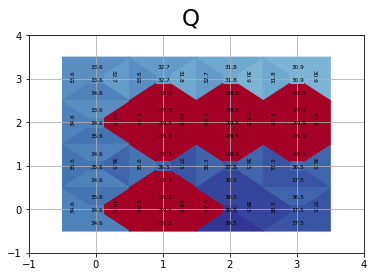

In [4]:
# plot q values 
plot_grid_values(env.gs, solver.compute_action_values(policy), title="Q")

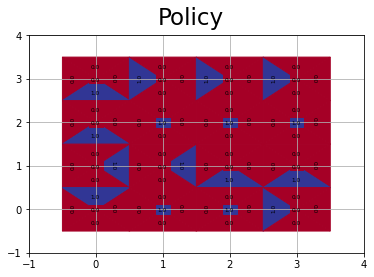

In [5]:
# plot policy
plot_grid_values(env.gs, policy, title="Policy")

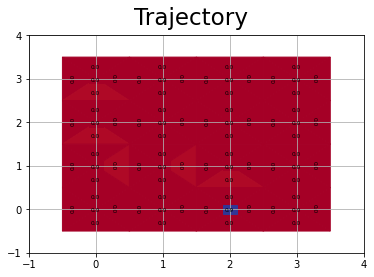

In [6]:
# plot state visitation frequency
plot_grid_values(env.gs, np.sum(visitation, axis=0), title="Trajectory")

In [7]:
# Same as the ConcervativeViSolver
solver = OracleCviSolver(env)
solver.set_options({"alpha": 0.5})
values = solver.solve()  # SxA
policy = solver.compute_policy(values)  # SxA
visitation = solver.compute_visitation(policy)  # S

 22%|██▏       | 2158/10000 [00:00<00:00, 11582.59it/s]

OracleCviSolver solve_options:
{   'alpha': 0.9,
    'beta': 1.0,
    'discount': 0.99,
    'max_operator': 'mellow_max',
    'num_trains': 10000,
    'record_performance_freq': 100,
    'seed': 0}
OracleCviSolver solve_options:
{   'alpha': 0.5,
    'beta': 1.0,
    'discount': 0.99,
    'max_operator': 'mellow_max',
    'num_trains': 10000,
    'record_performance_freq': 100,
    'seed': 0}
Iteration finished with maximum error:  9.933103228831897e-10


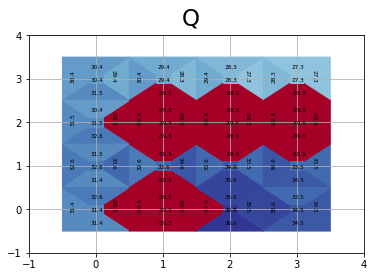

In [8]:
# plot q values
plot_grid_values(env.gs, solver.compute_action_values(policy), title="Q")

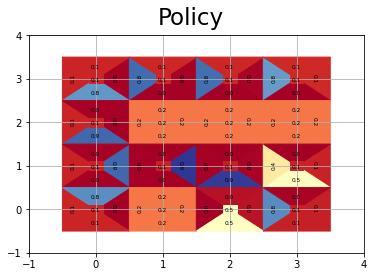

In [9]:
# plot policy 
plot_grid_values(env.gs, policy, title="Policy")

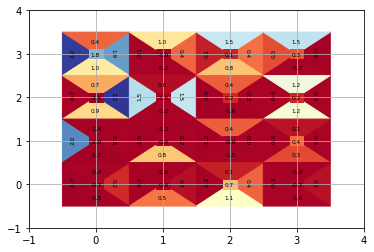

In [10]:
# You can plot any matrix with its shape of SxA
random_values = np.random.randn(*values.shape)
plot_grid_values(env.gs, random_values)

In [11]:
# The plot_grid_values function can return the image as a np.array.
# This is useful for tensorboard.add_image.

image_array = plot_grid_values(env.gs, random_values, return_image=True)
print(image_array.shape)

(3, 288, 432)


# Pendulum

In [12]:
from debug_rl.envs.pendulum import Pendulum, plot_pendulum_values, reshape_values

In [13]:
env = Pendulum()

/home/dl-box/anaconda3/envs/scvi/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [14]:
vi_solver = OracleViSolver(env)
values = vi_solver.solve()
policy = vi_solver.compute_policy(values)
visitation = vi_solver.compute_visitation(policy)

  7%|▋         | 741/10000 [00:00<00:01, 7401.66it/s]

OracleViSolver solve_options:
{   'alpha': 0.9,
    'beta': 1.0,
    'discount': 0.99,
    'max_operator': 'mellow_max',
    'num_trains': 10000,
    'record_performance_freq': 100,
    'seed': 0}


 17%|█▋        | 1672/10000 [00:00<00:01, 7321.79it/s]

Iteration finished with maximum error:  9.9237662531948e-10


/home/dl-box/debugRL/debug_rl/envs/pendulum/plotter.py:47: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


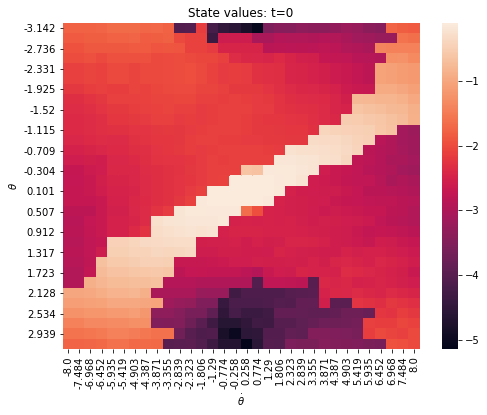

In [15]:
# plot the state values
v_values = np.max(values, axis=-1)
vmin = v_values.min()
vmax = v_values.max()
v_values = reshape_values(env, v_values)
plot_pendulum_values(env, v_values, vmin=vmin, vmax=vmax, title="State values: t=0")